In [1]:
import pandas as pd

df = pd.read_csv('Data/ozone2.csv')
df.head(3)

,Month,Day,Solar.R,Wind,Temp,Ozone,Result
0,5,1,190.0,7.4,67,41,0
1,5,2,118.0,8.0,72,36,0
2,5,3,149.0,12.6,74,12,0


In [2]:
X = df[['Solar.R', 'Wind', 'Temp']]
y = df[["Ozone"]]

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [4]:
import numpy as np

X_train = np.array(X_train_scaled,dtype=np.float32)
y_train = np.array(y_train,dtype=np.float32)
X_test = np.array(X_test_scaled,dtype=np.float32)
y_test = np.array(y_test,dtype=np.float32)

In [5]:
import torch

inputs = torch.from_numpy(X_train)
targets = torch.from_numpy(y_train)

In [6]:
import torch.nn as nn
input_dim = X_train.shape[1]
output_dim = 64
model = nn.Sequential(
    nn.Linear(input_dim, 24),
    nn.ReLU(),
    nn.Linear(24,12),
    nn.ReLU(),
    nn.Linear(12,3),
    nn.ReLU(),
    nn.Linear(3,1)
)

In [7]:
print(model)
print(model[6].weight)
print(model[6].bias)

Sequential(
  (0): Linear(in_features=3, out_features=24, bias=True)
  (1): ReLU()
  (2): Linear(in_features=24, out_features=12, bias=True)
  (3): ReLU()
  (4): Linear(in_features=12, out_features=3, bias=True)
  (5): ReLU()
  (6): Linear(in_features=3, out_features=1, bias=True)
)
Parameter containing:
tensor([[-0.4799, -0.1532,  0.2388]], requires_grad=True)
Parameter containing:
tensor([-0.0577], requires_grad=True)


In [8]:
mse = nn.MSELoss()

In [9]:
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)
loss_list = []
iteration_number = 5000
for iteration in range(iteration_number):
    optimizer.zero_grad()          # 가중치 초기화
    results = model(inputs)        # 순전파
    loss = mse(results, targets)   # 오차계산
    loss.backward()                # 역전파 계산
    optimizer.step()               # 가중치 수정
    loss_list.append(loss.data)
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

epoch 0, loss 2812.246826171875
epoch 50, loss 573.2052001953125
epoch 100, loss 350.5919189453125
epoch 150, loss 340.0054626464844
epoch 200, loss 332.6561584472656
epoch 250, loss 327.60247802734375
epoch 300, loss 324.50164794921875
epoch 350, loss 321.915283203125
epoch 400, loss 319.6369323730469
epoch 450, loss 317.50531005859375
epoch 500, loss 315.2742919921875
epoch 550, loss 313.3735046386719
epoch 600, loss 311.9687194824219
epoch 650, loss 311.03973388671875
epoch 700, loss 310.19866943359375
epoch 750, loss 309.5718688964844
epoch 800, loss 309.1363220214844
epoch 850, loss 308.70367431640625
epoch 900, loss 308.33087158203125
epoch 950, loss 307.7956237792969
epoch 1000, loss 307.2991027832031
epoch 1050, loss 306.71246337890625
epoch 1100, loss 304.05169677734375
epoch 1150, loss 296.9987487792969
epoch 1200, loss 286.4383544921875
epoch 1250, loss 271.9319763183594
epoch 1300, loss 254.26785278320312
epoch 1350, loss 233.92913818359375
epoch 1400, loss 221.427947998046

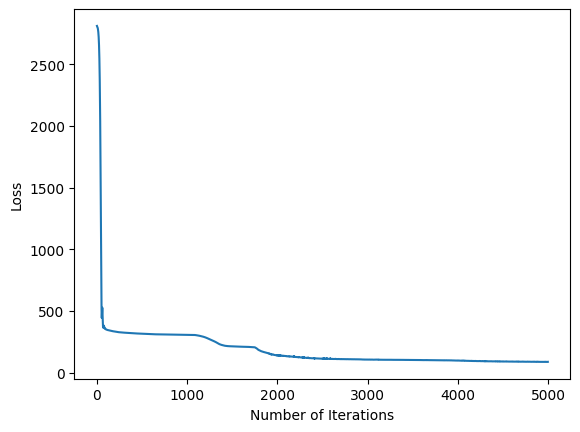

In [10]:
import matplotlib.pyplot as plt

plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

In [11]:
input_x_test = torch.from_numpy(X_test)
predicted = model(input_x_test.float()).data.numpy()
predicted[0:5]

array([[ 57.38911 ],
       [ 38.898983],
       [ 86.33936 ],
       [ 43.10611 ],
       [115.39268 ]], dtype=float32)

In [12]:
loss.data.item() # mse

87.60189819335938

In [13]:
np.sqrt(loss.data.item()) # rmse

9.35958856966263

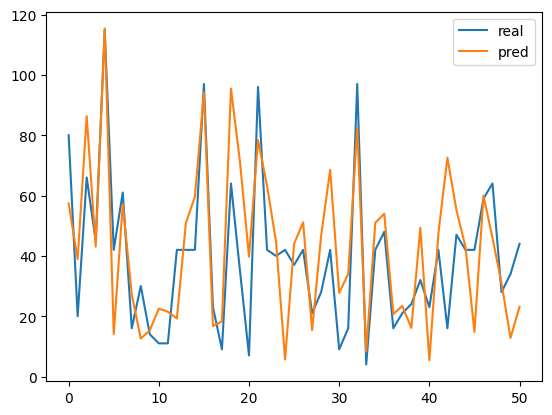

In [14]:
X_test = torch.from_numpy(X_test)
plt.plot(y_test, label='real')
plt.plot(model(X_test).detach().numpy(), label='pred')
plt.legend()
plt.show()